In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


### Reading the standard Advertising dataset

In [2]:
# Read the file 'Advertising.csv' into a Pandas dataset
df = pd.read_csv('Advertising.csv')


In [3]:
# Take a quick look at the data
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Set the 'TV' column as predictor variable
x = df[['TV']]

# Set the 'Sales' column as response variable 
y = df[['Sales']]


### Train-Test split

In [5]:
### edTest(test_shape) ###
# Split the dataset in training and testing with 60% training set and 
# 40% testing set 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)

In [6]:
### edTest(test_nums) ###
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min and 
# k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)


### Model fit

/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


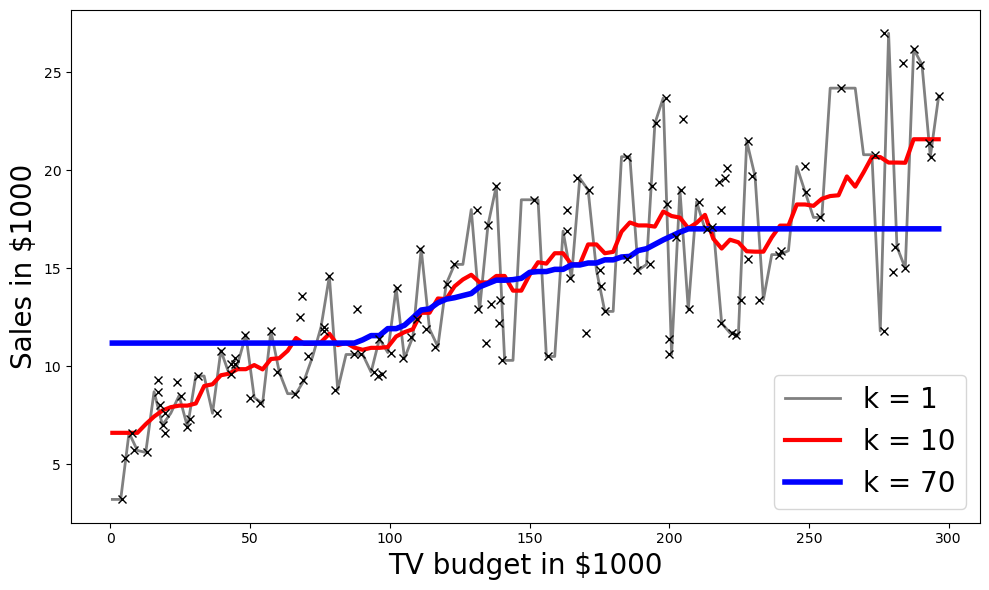

In [7]:
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10,6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j=0

# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_test, y_pred)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE
    
    
    # Helper code to plot the data and various kNN model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()


### Graph plot

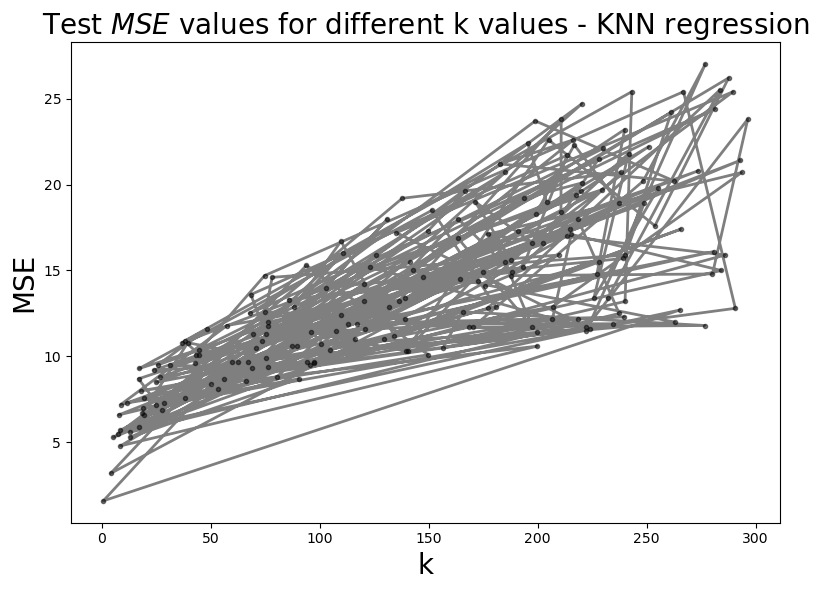

In [8]:
# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(x, y,'k.-',alpha=0.5,linewidth=2)

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()


### Find the best knn model

In [9]:
### edTest(test_mse) ###

# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]

# Print the best k-value
print ("The best k value is ",best_model,"with a MSE of ", min_mse)


The best k value is  [9] with a MSE of  13.046766975308643


### ⏸ From the options below, how would you classify the "goodness" of your model?

#### A. Good
#### B. Satisfactory
#### C. Bad

In [10]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'A'


In [11]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")


The R2 score for your model is 0.5492457002030715


### ⏸ After observing the $R^2$ value, how would you now classify your model?

#### A. Good
#### B. Satisfactory
#### C. Bad


In [12]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'
